# WeRateDogs

## Gather

In [1]:
import pandas as pd
import requests
import json
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

# preview of the loaded dataset
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# download image predictions using requests libraries

URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)
open('image_predictions.tsv', 'wb').write(response.content)

image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')

# preview of the loaded dataset
image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [4]:
# get data using twitter API (tweepy)

# secret keys
consumer_key = 'HIDDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_token_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 375


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 353


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [5]:
# Loading the file retru=ieved into a DataFrame
df_api = (pd.read_json('tweet_json.txt', lines=True) .loc[:, ['id', 'retweet_count', 'favorite_count']])

# view sample data
df_api.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,6954,33647
1,892177421306343426,5259,29181
2,891815181378084864,3462,21949


## Assess

### Twitter Archive File
The Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." <br>
Of the 5000+ tweets, it has been filtered for tweets with ratings only (there are 2356).

In [6]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [9]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# number of null values
archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
# checking for duplicate values
archive.duplicated().any()

False

In [12]:
archive['name'].value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [13]:
archive[archive['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


### Image Prediction File
This Image predictions file contains a table full of image predictions (the top 3 only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 - 4 since tweets can have up to four images).

- tweet_id is the unique identifier for each tweeet
- jpg_url is the url for each image
- img_num is the number that corresponds to the most confident prediction
- p1 is the algorithm's #1 prediction for the image in the tweet
- p1_conf is how confident the algorithm is in its #1 prediction
- p1_dog is whether or not the #1 prediction is a breed of dog
- p2 is the algorithm's second most likely prediction
- p2_conf is how confident the algorithm is in its #2 prediction
- p2_dog is whether or not the #2 prediction is a breed of dog
- etc.

In [14]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [17]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
# checking for duplicates
image_pred.duplicated().any()

False

### Additional Data : Twitter API data
This contains additional tweets information such as the `likes`, `retweets` which have been acquired from twitter in order to add additional insight to our existing tweet information.

In [19]:
df_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,6954,33647
1,892177421306343426,5259,29181
2,891815181378084864,3462,21949
3,891689557279858688,7176,36721
4,891327558926688256,7705,35118


In [20]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [21]:
df_api.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

In [22]:
df_api.describe()

,id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417346e+17,2454.482803,7018.121668
std,6.816442e+16,4155.427749,10901.602609
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,493.000000,1219.500000
50%,7.178159e+17,1143.500000,3034.000000
75%,7.986402e+17,2842.500000,8561.500000
max,8.924206e+17,70144.000000,143950.000000


In [23]:
df_api.duplicated().any()

False

#### Quality
- Extreme values in Rating_numerator and rating_denominator columns
- Extract source text from links
- tweets with retweets not needed
- drop unecessary columns
- erroneous datatype (`timestamp` column)
- erroneous datatype for (`id` column)
- erroneous datatype for (`tweet_id` column) in images and archive table
- Misrepresentation of null values across all dog stages columns
- "url" at the back of tweet text in the `archive` table
- invalid dog names such as 'such', 'the', 'this', 'None', etc in the archive table
- dog breed column can be simplified
- some values seperated with "_" instead of " " in the `image prediction` table

#### Tidiness
- doggo, floofer, pupper, puppo should be combined into a "dog stages" column
- (`timestamp` column) should be separated into date and time
- only the best image prediction is needed (`p1` column)
- multiple datasets

## Clean

In [24]:
# make a copy of each dataset
archive_clean = archive.copy()
images_clean = image_pred.copy()
counts_clean = df_api.copy()

#### Define
Correcting the ratings denominator and numerators with extreme values or dropping them if needed. <br>
Then drop the rating denominator column and rename the ratings numerator column to "rating"

#### Code

In [25]:
# Any rating denominator > 10  and ratings numerator > 14 are invalid for this dataset. 
archive_clean = archive_clean.query('rating_denominator == 10 & rating_numerator <= 14')

# renaming the rating column
archive_clean.rename(columns={'rating_numerator': 'rating'}, inplace=True)

# dropping the rating denominator
archive_clean.drop('rating_denominator', axis = 1, inplace = True)


#### Test

In [26]:
archive_clean['rating'].sample(5)

1690     9
1564    10
526     13
840     13
373     13
Name: rating, dtype: int64

#### Define
With regex and pandas `.str.extract()`, extract the source text located within the link provided

#### Code

In [27]:
archive_clean['source'] = archive_clean['source'].str.extract(r'<a.*>(.*)</a>')

#### Test

In [28]:
archive_clean['source'].sample(5)

1744    Twitter for iPhone
7       Twitter for iPhone
89      Twitter for iPhone
653     Twitter for iPhone
573     Twitter for iPhone
Name: source, dtype: object

#### Define
Since the tweets with retweets are not needed, we would be dropping the rows that have entries in the "retweeted" columns using pandas `.drop` function

#### Code

In [29]:
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notna()].index, inplace = True)
archive_clean.drop(archive_clean[archive_clean['in_reply_to_status_id'].notna()].index, inplace = True)

#### Test

In [30]:
# the number of entries in the retweeted and reply columns should be 0
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2072 non-null   object 
 10  rating                      2075 non-null   int64  
 11  name                        2075 non-null   object 
 12  doggo                       2075 non-null   object 
 13  floofer                     2075 

#### Define
Drop columns that don't seem relevant to the dataset like the "retweeted" and "reply" columns using pandas `.drop()` function

#### Code

In [31]:
archive_clean.drop(['retweeted_status_id',
                    'retweeted_status_user_id',
                    'retweeted_status_timestamp',
                    'in_reply_to_status_id',
                    'in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [32]:
# the retweet and reply columns should no longer exist
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Define
Change the `timestamp` column to datetime using `pandas .to_datetime()` function.<br>
Change datatype for `tweet_id` column in the three tables to `str` using pandas `.astype()` function.

#### Code

In [33]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
# changing the datatype for the twitter archive table
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
# changing the datatype for the image prediction table
images_clean['tweet_id'] = images_clean['tweet_id'].astype(str)
# changing the datatype for the additional data (API) table
counts_clean['id'] = counts_clean['id'].astype(str)

#### Test

In [34]:
# all the datatypes should be str or object('O')
d1 = archive_clean['tweet_id'].dtypes
d2 = images_clean['tweet_id'].dtypes
d3 = counts_clean['id'].dtypes
d4 = archive_clean['timestamp']
print(d1, d2, d3, d4)

object object object 0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2075, dtype: datetime64[ns, UTC]


#### Define
Proper representation of null values across all dog stages column using pandas `.replace()` function. <br> Then combining all four dog stages column into a single column called `dog_stage` using pandas string concatenation function and remove all the individual dog stage columns using pandas `.drop()`

#### Code

In [35]:
# replacing "None" with ""
archive_clean['doggo'].replace('None', '', inplace = True)
archive_clean['floofer'].replace('None', '', inplace = True)
archive_clean['pupper'].replace('None', '', inplace = True)
archive_clean['puppo'].replace('None', '', inplace = True)

# creating a new column called dog_stage and populate it with all the dog stages columns
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

# checking for the contents of the dog_stage column
archive_clean['dog_stage'].value_counts()

                1740
pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [36]:
# replacing "empty" columns with "unknown"
archive_clean['dog_stage'].replace('', 'unknown', inplace = True)

# renaming dog_stage names to seperate names joined together during concatenation
archive_clean.loc[archive_clean['dog_stage']=='doggopupper','dog_stage']='doggo, pupper'
archive_clean.loc[archive_clean['dog_stage']=='doggofloofer','dog_stage']='doggo, floofer'
archive_clean.loc[archive_clean['dog_stage']=='doggopuppo','dog_stage']='doggo, puppo'

# dropping the individual dog stage columns because they are no longer relevant
archive_clean.drop(['doggo', 'pupper', 'floofer', 'puppo'], axis = 1, inplace = True)

#### Test

In [37]:
# check the columns on the Archive table
archive_clean.columns 
# the individual dog stage coluns has been dropped and replaced by a dog_stage column

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating',
       'name', 'dog_stage'],
      dtype='object')

In [38]:
# check to see if the blank entries in the "dog_stage" column has been replaced by "unknown"
archive_clean['dog_stage'].value_counts()

unknown           1740
pupper             220
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

#### Define
Seperate the `timestamp` column into `date` and `time` column using `.dt.time` for the time column, and `.dt.date` for the date column. <br>
After seperating the timestamp column should be dropped using pandas `.drop()` function

#### Code

In [39]:
# extraction for the date column
archive_clean['date'] = pd.to_datetime(archive_clean['timestamp'].dt.date) # "pd.to_datetime" is used to convert the date column to datetime format
# extraction for the date column
archive_clean['time'] = archive_clean['timestamp'].dt.time
# dropping the "timestamp" column
archive_clean.drop(['timestamp'], axis = 1, inplace = True)

#### Test

In [40]:
# checking for the newly created date and time columns and the removed timestamp column
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2075 non-null   object        
 1   source         2075 non-null   object        
 2   text           2075 non-null   object        
 3   expanded_urls  2072 non-null   object        
 4   rating         2075 non-null   int64         
 5   name           2075 non-null   object        
 6   dog_stage      2075 non-null   object        
 7   date           2075 non-null   datetime64[ns]
 8   time           2075 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 162.1+ KB


#### Define
Remove the url at the back of the tweet text using the `.str.replace()` function with regex


#### Code

In [41]:
archive_clean['text'] = archive_clean['text'].str.replace(r'\s*http\S*', '', regex = True)

#### Test

In [42]:
archive_clean.head(2)

,tweet_id,source,text,expanded_urls,rating,name,dog_stage,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,unknown,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,unknown,2017-08-01,00:17:27


#### Define
Replace all the 'None' values in the name column with an empty quote ('') using pandas `.replace()` function. <br>
There are invalid names in the `name` column in the archive table, but a good thing is that all the invalid names are in lowercase so we would check for all the names with lowercase using pandas `.str.islower()` function and then remove those names from the archive table.

#### Code

In [43]:
archive_clean['name'].replace('None', '', inplace = True)
archive_clean['name'].str.islower().value_counts() # this shows that we have 104 names in lowercase
archive_clean = archive_clean[~archive_clean['name'].str.islower()] # isolating all the data without lowercase names and reassigning them as the new archive table

#### Test

In [44]:
archive_clean['name'].str.islower().value_counts()

False    1974
Name: name, dtype: int64

#### Define
Since we want only the best image prediction and we have three different predictions, we would check the prediction algorithm with the highest confidence and return the prediction for that particular algorithm.

#### Code

In [45]:
breed = [] # list of breeds
def best_image_pred(pred):
    if (pred['p1_conf'] > pred['p2_conf']
            and
       pred['p1_conf'] > pred['p3_conf']):
        breed = pred['p1']
    elif (pred['p2_conf'] > pred['p3_conf']):
        breed = pred['p2']
    else:
        breed = pred['p3']
    return breed
images_clean['breed'] = images_clean.apply(best_image_pred, axis = 1)

# dropping the remaining columns
images_clean = images_clean[images_clean.columns[images_clean.columns.isin(['tweet_id', 'jpg_url', 'breed'])]]

#### Test

In [46]:
images_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


#### Define
Replace the "_" with " " in the breed column using pandas `.str.replace()` and set all the dog breads to a uniform case function in the image prediction table

#### Code

In [47]:
# replacing the '_' with ' '
images_clean['breed'] = images_clean['breed'].str.replace('_', ' ')
# setting a uniform case for all the breeds
images_clean['breed'] = images_clean['breed'].str.title()

#### Test

In [48]:
images_clean['breed'].head()

0    Welsh Springer Spaniel
1                   Redbone
2           German Shepherd
3       Rhodesian Ridgeback
4        Miniature Pinscher
Name: breed, dtype: object

#### Define
All three datasets, tweet archive, image prediction and additional info should be merged into one major dataset using the tweet_id.

#### Code

In [49]:
twitter_archive_master = pd.merge(pd.merge(archive_clean, images_clean, on = 'tweet_id', how = 'inner'), counts_clean, left_on ='tweet_id', right_on = 'id', how = 'inner')
# drop the "id" column
twitter_archive_master = twitter_archive_master.drop('id', axis = 1)

#### Test

In [50]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1846 entries, 0 to 1845
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1846 non-null   object        
 1   source          1846 non-null   object        
 2   text            1846 non-null   object        
 3   expanded_urls   1846 non-null   object        
 4   rating          1846 non-null   int64         
 5   name            1846 non-null   object        
 6   dog_stage       1846 non-null   object        
 7   date            1846 non-null   datetime64[ns]
 8   time            1846 non-null   object        
 9   jpg_url         1846 non-null   object        
 10  breed           1846 non-null   object        
 11  retweet_count   1846 non-null   int64         
 12  favorite_count  1846 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 201.9+ KB


In [51]:
twitter_archive_master.sample(3)

,tweet_id,source,text,expanded_urls,rating,name,dog_stage,date,time,jpg_url,breed,retweet_count,favorite_count
1359,677547928504967168,Twitter for iPhone,Not much to say here. I just think everyone ne...,https://twitter.com/dog_rates/status/677547928...,12,,unknown,2015-12-17,17:56:29,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,American Staffordshire Terrier,3279,6286
1004,702932127499816960,Twitter for iPhone,This is Chip. He's an Upper West Nile Pantaloo...,https://twitter.com/dog_rates/status/702932127...,6,Chip,unknown,2016-02-25,19:04:13,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,Wallaby,648,2362
309,821044531881721856,Twitter for iPhone,This is Flash. He went way too hard celebratin...,https://twitter.com/dog_rates/status/821044531...,12,Flash,unknown,2017-01-16,17:20:45,https://pbs.twimg.com/media/C2Tvo20XcAAhNL9.jpg,Old English Sheepdog,2109,11875


#### Save master dataset as csv file

In [52]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

### Analysing and Visualization

In [53]:
vdata = twitter_archive_master.drop(columns = ['time', 'expanded_urls', 'text'])

In [54]:
vdata.head()

,tweet_id,source,rating,name,dog_stage,date,jpg_url,breed,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,13,Phineas,unknown,2017-08-01,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,6954,33647
1,892177421306343426,Twitter for iPhone,13,Tilly,unknown,2017-08-01,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,5259,29181
2,891815181378084864,Twitter for iPhone,12,Archie,unknown,2017-07-31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,3462,21949
3,891689557279858688,Twitter for iPhone,13,Darla,unknown,2017-07-30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,7176,36721
4,891327558926688256,Twitter for iPhone,12,Franklin,unknown,2017-07-29,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,7705,35118


#### Distribution of Tweet Source

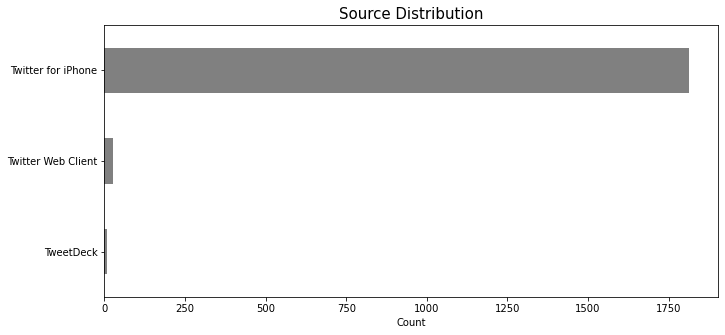

In [55]:
# the count for each source
s_count = vdata['source'].value_counts()
plt.figure(figsize = (11,5))
ax = s_count.plot(kind="barh", color = 'gray')
ax.set_title('Source Distribution', fontsize = 15)
ax.set_xlabel('Count')
ax.invert_yaxis()

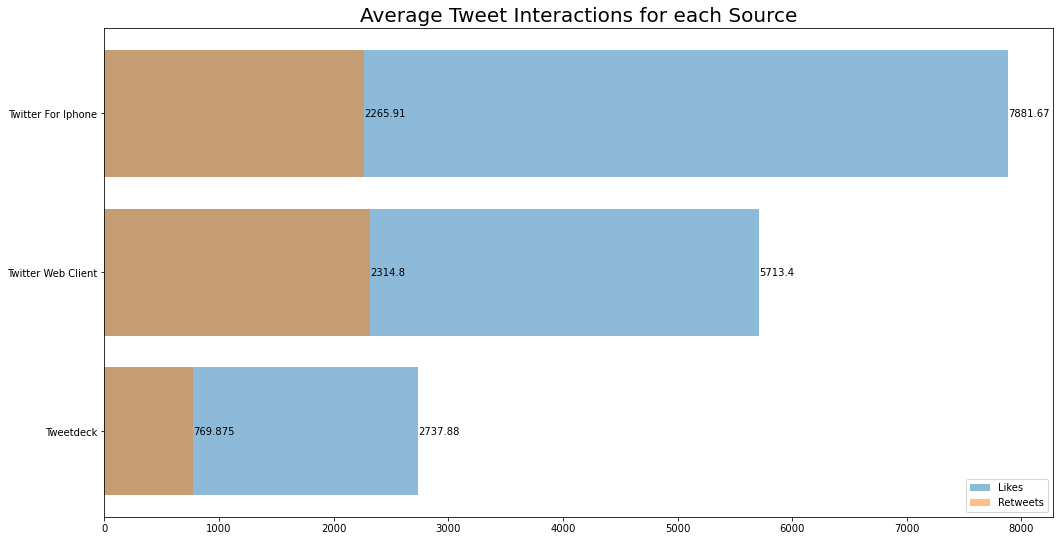

In [56]:
# Getting the average like for each source
avg_like = vdata.groupby('source').mean().favorite_count
avg_retweet = vdata.groupby('source').mean().retweet_count
locations = [1, 2, 3]
labels = avg_like.index.str.title()
fig, ax = plt.subplots(figsize =(17,9))
ax.barh(locations, avg_like, alpha=0.5, label='Likes')
ax.barh(locations, avg_retweet, alpha=0.5, label='Retweets')
ax.set_title('Average Tweet Interactions for each Source', fontsize = 20)
ax.set_yticks(locations, labels)
for container in ax.containers:
    ax.bar_label(container)
ax.legend(loc='lower right');

#### Likes and Retweets Correlation

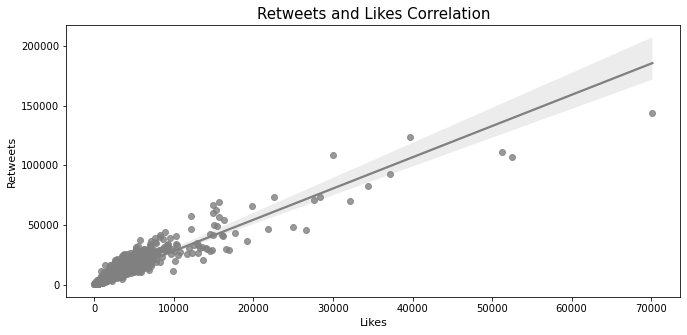

In [57]:
plt.figure(figsize = (11,5))
sb.regplot(x = vdata['retweet_count'], y = vdata['favorite_count'], data = 'vdata', color = 'gray')
plt.title('Retweets and Likes Correlation', fontsize = 15)
plt.xlabel('Likes', fontsize = 11)
plt.ylabel('Retweets', fontsize = 11);

#### Distribution of Rating

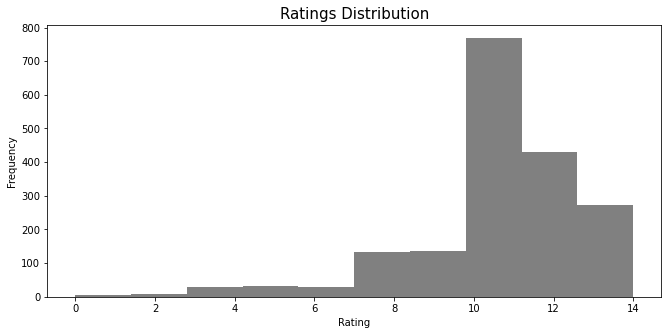

In [58]:
plt.figure(figsize = (11, 5))
vdata.rating.plot(kind = 'hist', color = 'gray')
plt.title('Ratings Distribution', fontsize = 15)
plt.xlabel('Rating');

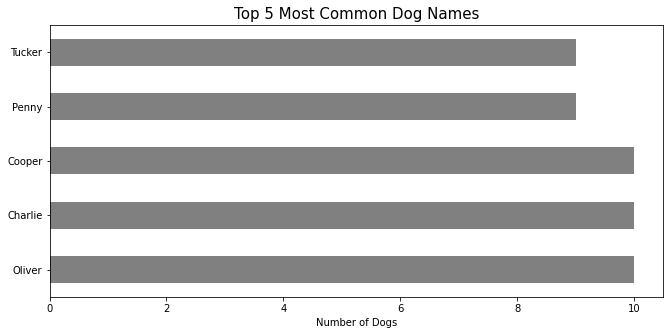

In [59]:
vdata.name.value_counts()[1:6].plot(kind = 'barh', figsize=(11,5), color = 'gray').set_xlabel("Number of Dogs")
plt.title('Top 5 Most Common Dog Names', fontsize = 15);

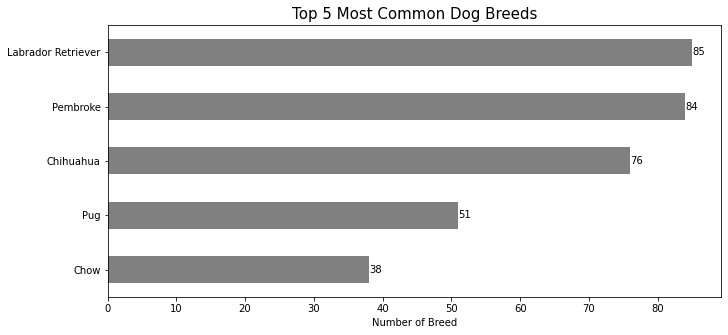

In [60]:
ax = vdata.breed.value_counts()[1:6].plot(kind = 'barh', figsize=(11,5), color = 'gray')
ax.set_xlabel("Number of Breed")
ax.invert_yaxis()
ax.bar_label(ax.containers[0])
plt.title('Top 5 Most Common Dog Breeds', fontsize = 15);